In [11]:
import numpy as np
import time, os, sys
import mxnet as mx
import matplotlib.pyplot as plt
import glob
import sys
from cellpose import models, utils

In [94]:
# check if GPU working, and if so use it
use_gpu = utils.use_gpu()
if use_gpu:
    device = mx.gpu()
else:
    device = mx.cpu()

In [95]:
def show(img,title):
    fig2 = plt.figure(figsize = (15,15))
    ax3 = fig2.add_subplot(111)
    ax3.imshow(img, interpolation='none')
    ax3.set_title(title)

In [96]:
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(device, model_type='cyto')

# list of files
files = ['data/raw/RAW_TIFF/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_10_ch_4.tif']

imgs = [plt.imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[2,3], [0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if rescale is set to None, the size of the cells is estimated on a per image basis
# if you want to set the size yourself, set it to 30. / average_cell_diameter
masks, flows, styles, diams = model.eval(imgs, rescale=None, channels=channels)

100%|██████████| 1/1 [00:08<00:00,  8.23s/it]


estimated cell diameters for all images


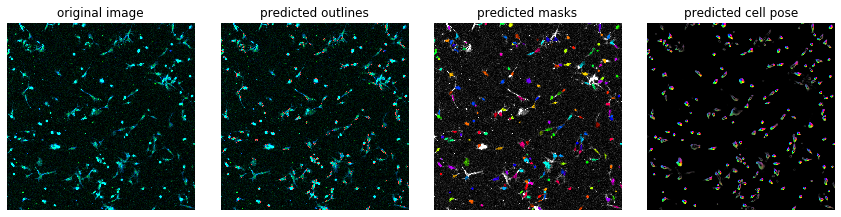

In [97]:
from cellpose import plot, transforms

for idx in range(nimg):
    img = transforms.reshape(imgs[idx], channels[idx])
    img = plot.rgb_image(img)
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,3))
    # can save images (set save_dir=None if not)
    plot.show_segmentation(fig, img, maski, flowi)
    plt.tight_layout()
    plt.show()

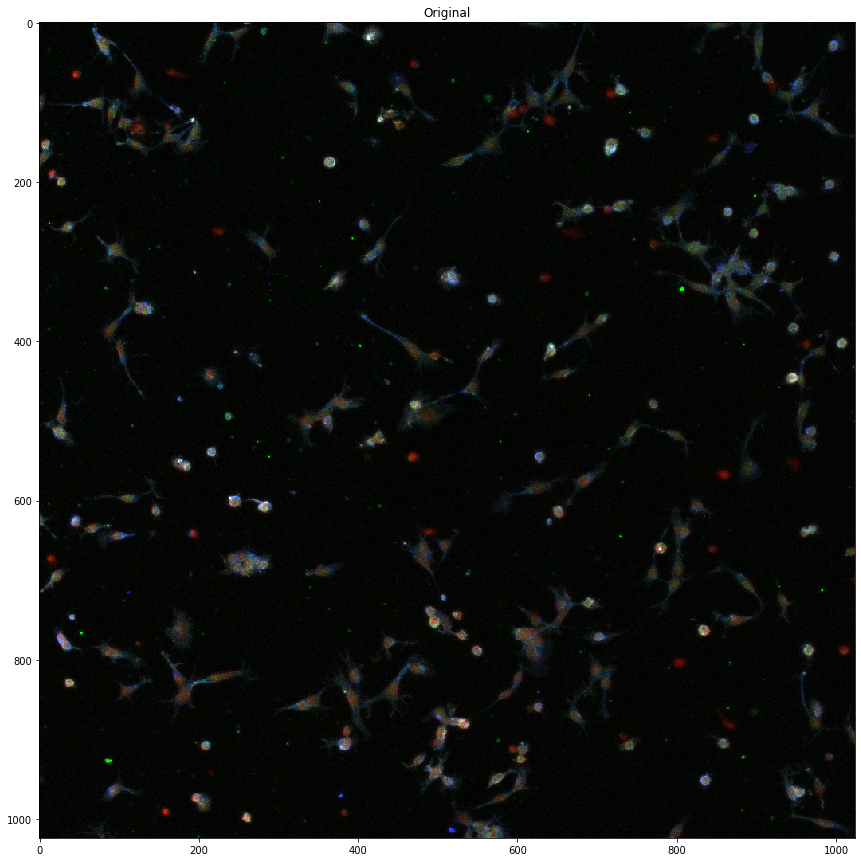

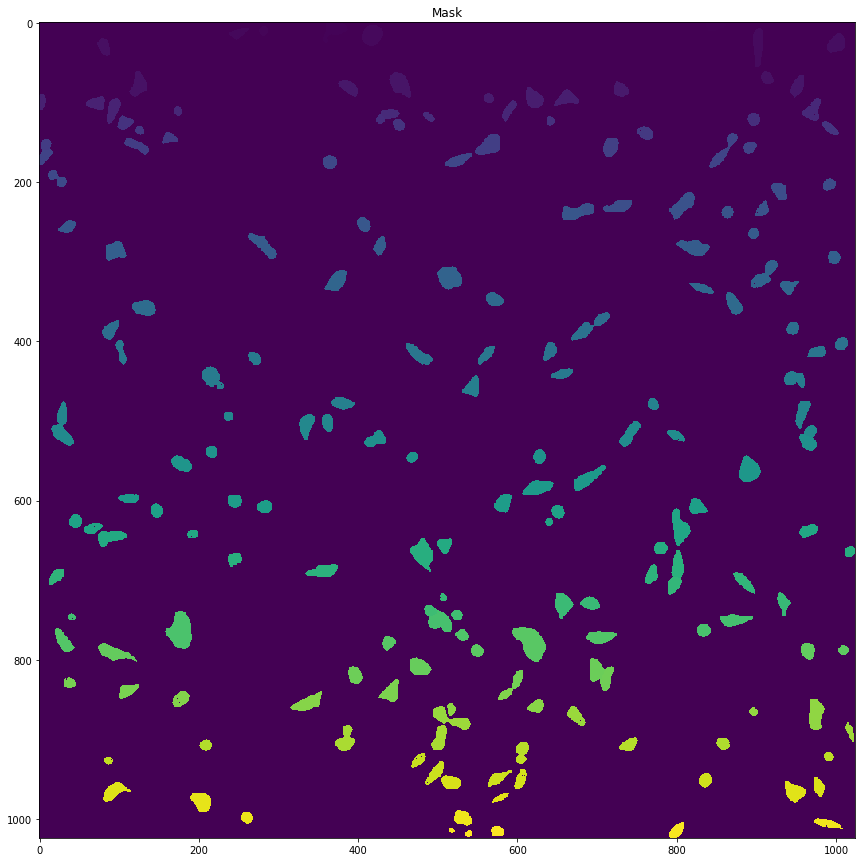

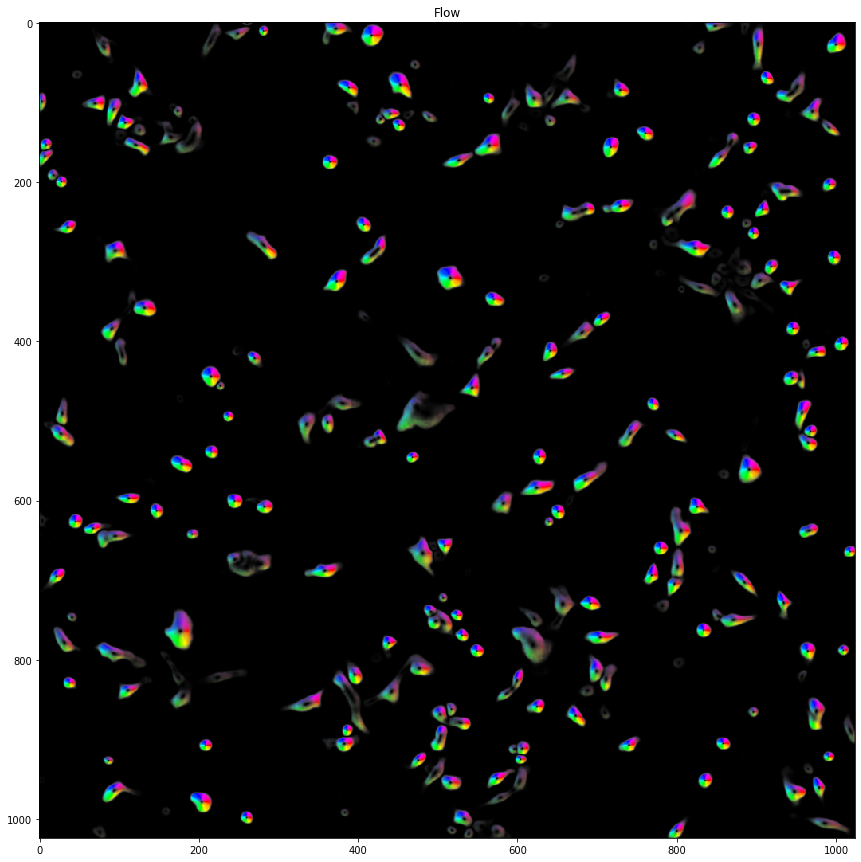

In [116]:
show(imgs[0],'Original')
show(masks[0],'Mask')
show(flows[0][0],'Flow')

In [117]:
masks[0].max()

199

In [118]:
len(flows[0])

3

In [124]:
stacked_img = np.stack((x,)*3, axis=-1)

In [125]:
stacked_img.shape

(1024, 1024, 3)

In [127]:
def activate(array,value):
    return (array == value) * 1
#     result = np.zeros(matrix.shape)
def activateImage(image,mask):
    return (mask == 1)*image
#     return result

In [122]:
x= activate(masks[0],110)

In [86]:
x.max()

1

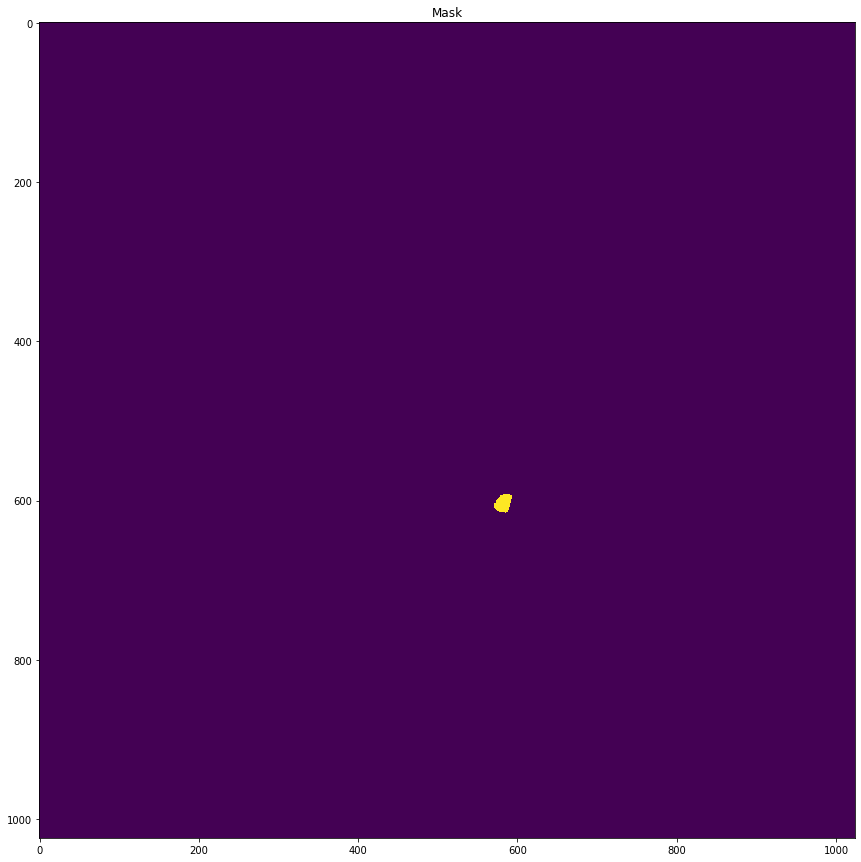

In [123]:
show(x,'Mask')

In [128]:
import cv2
image = imgs[0]
dst = activateImage(image, stacked_img)

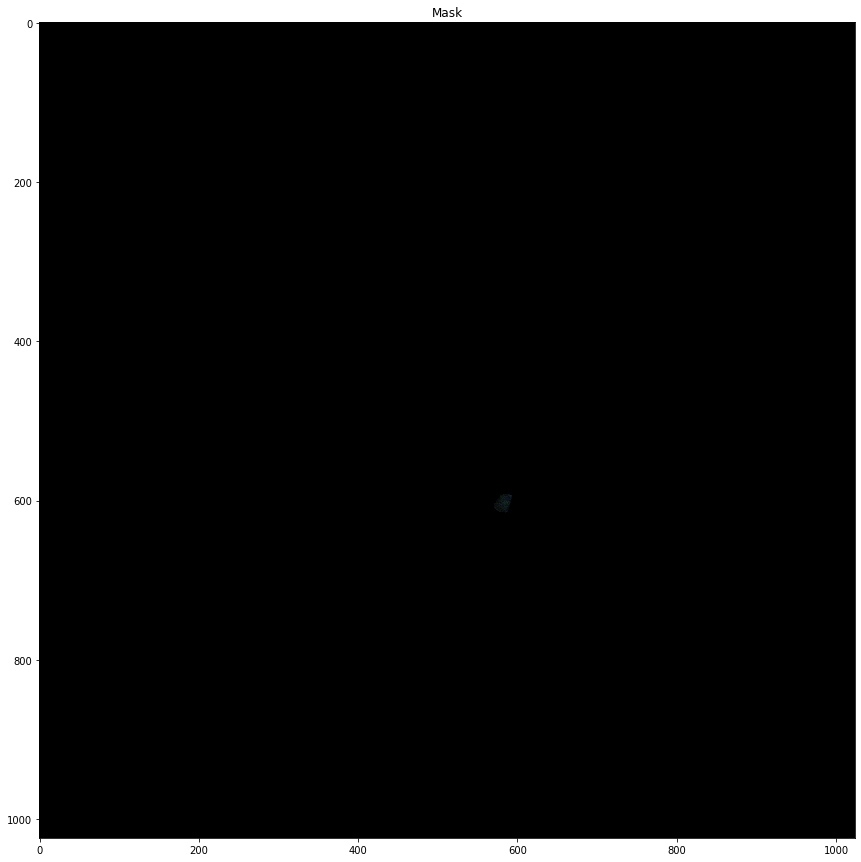

In [129]:
show(dst,'Mask')

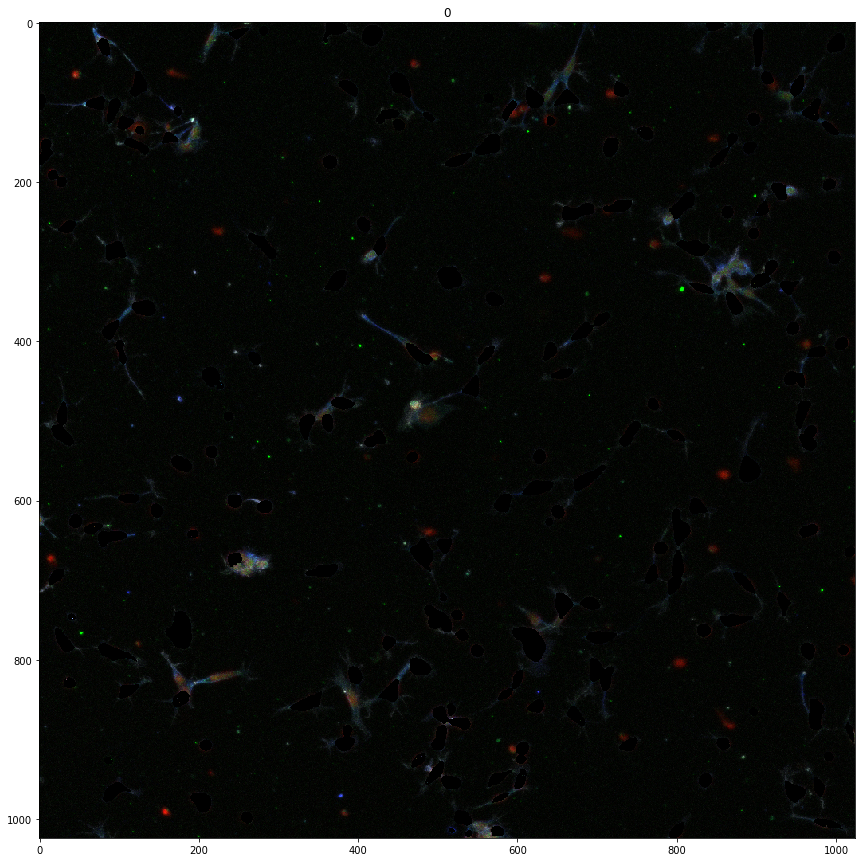

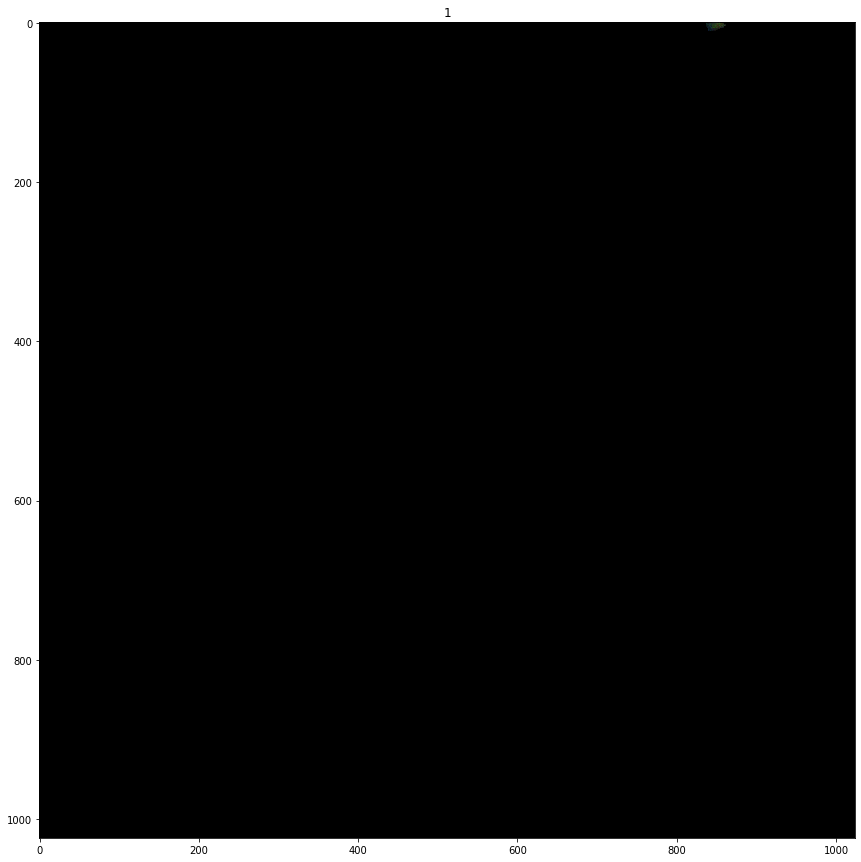

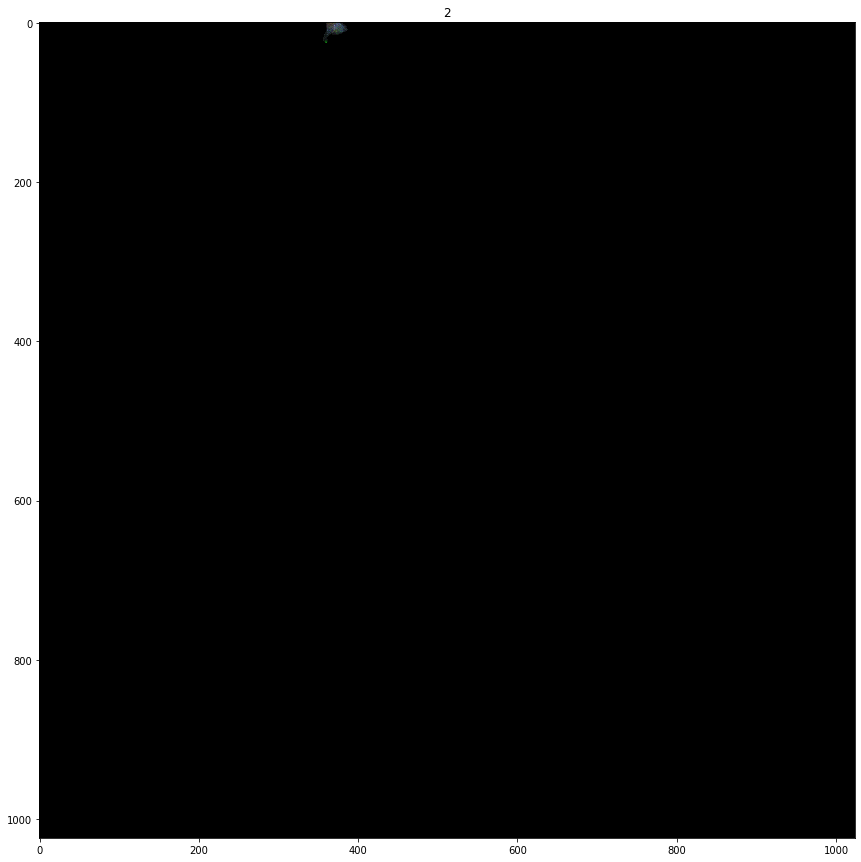

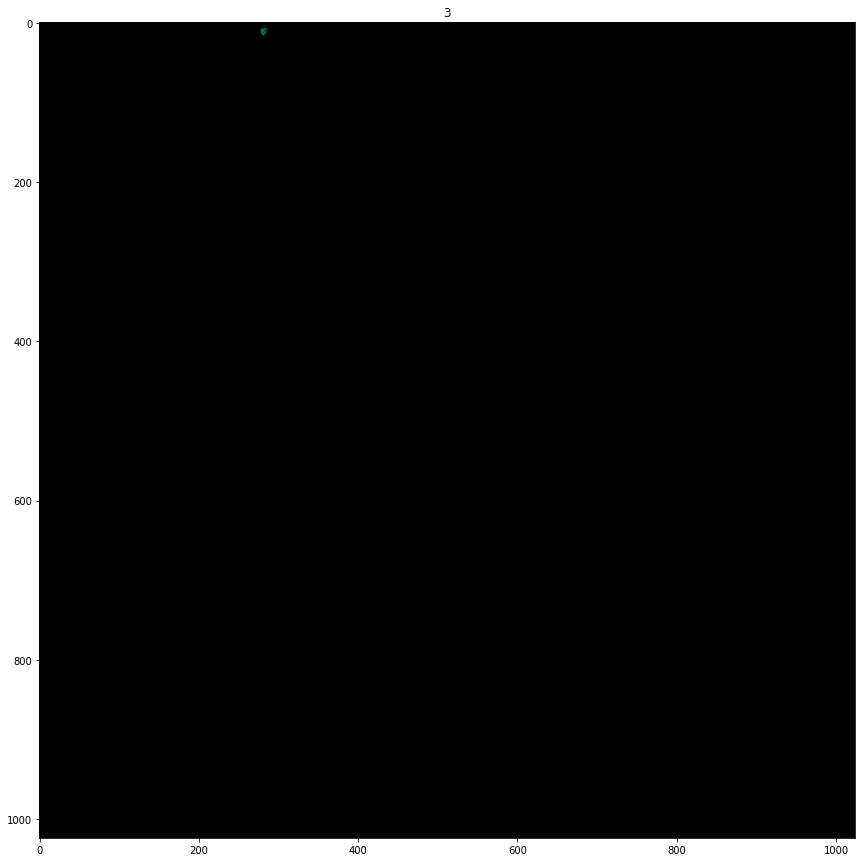

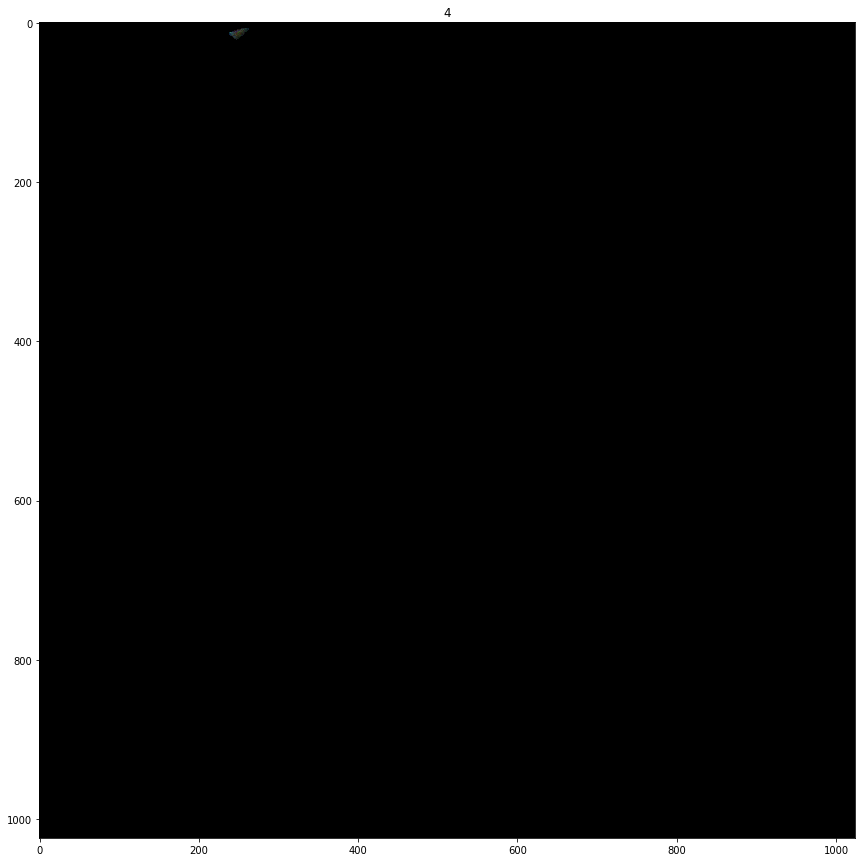

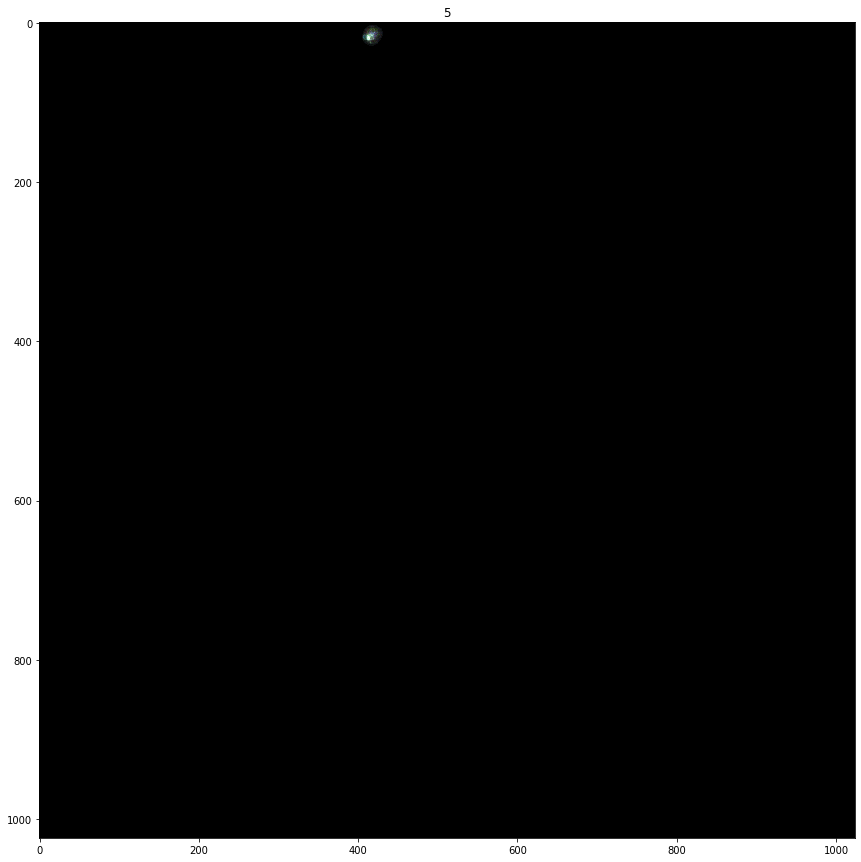

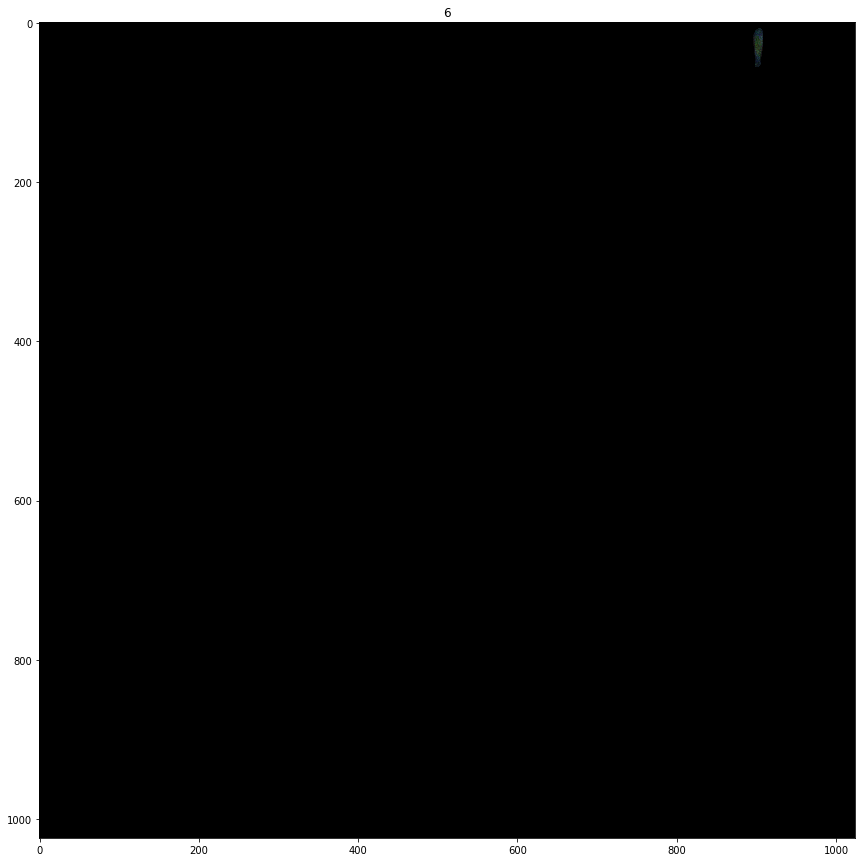

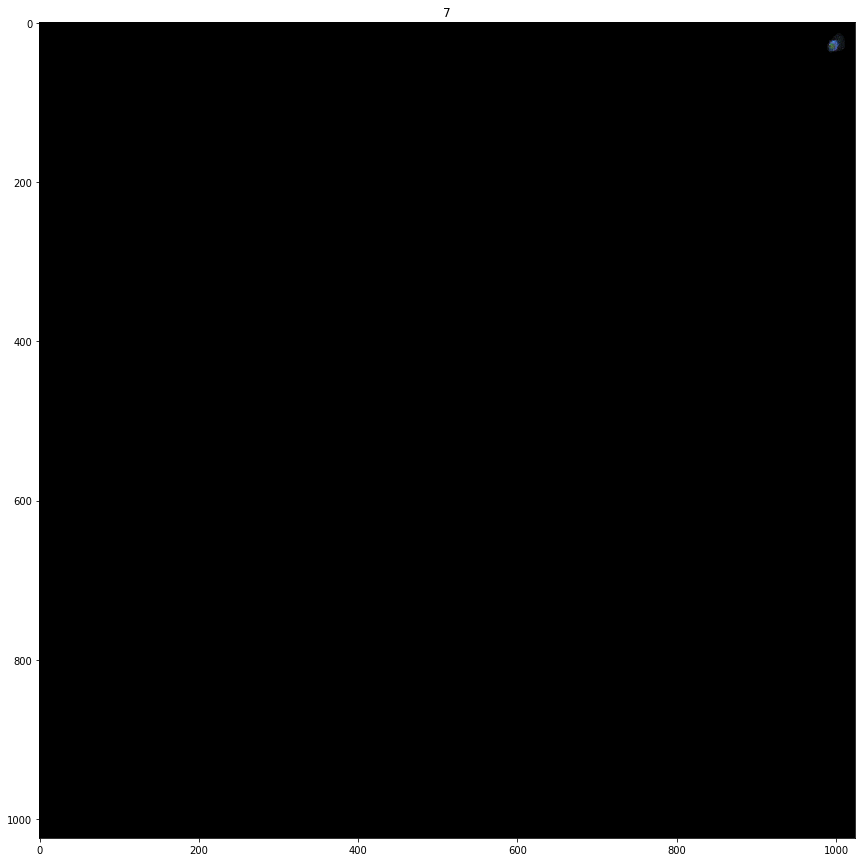

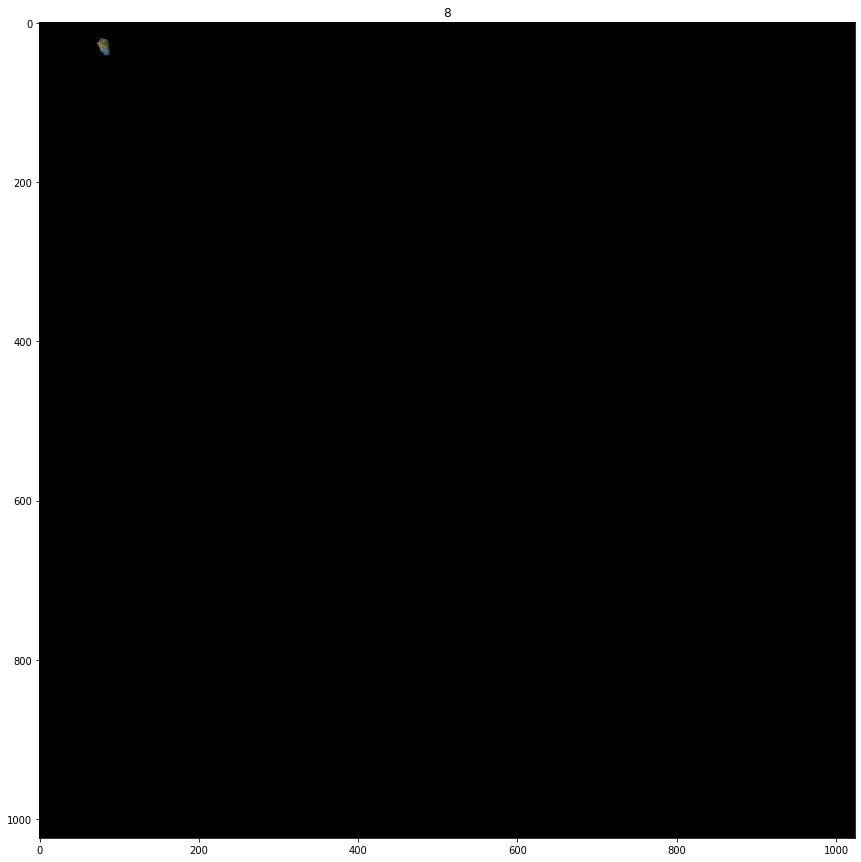

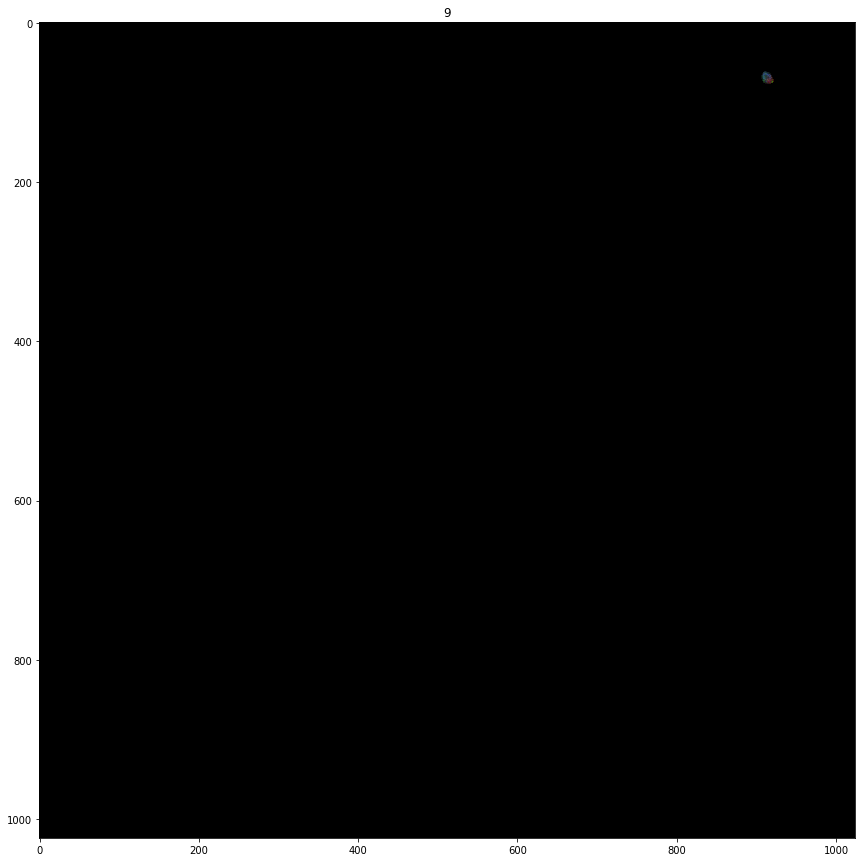

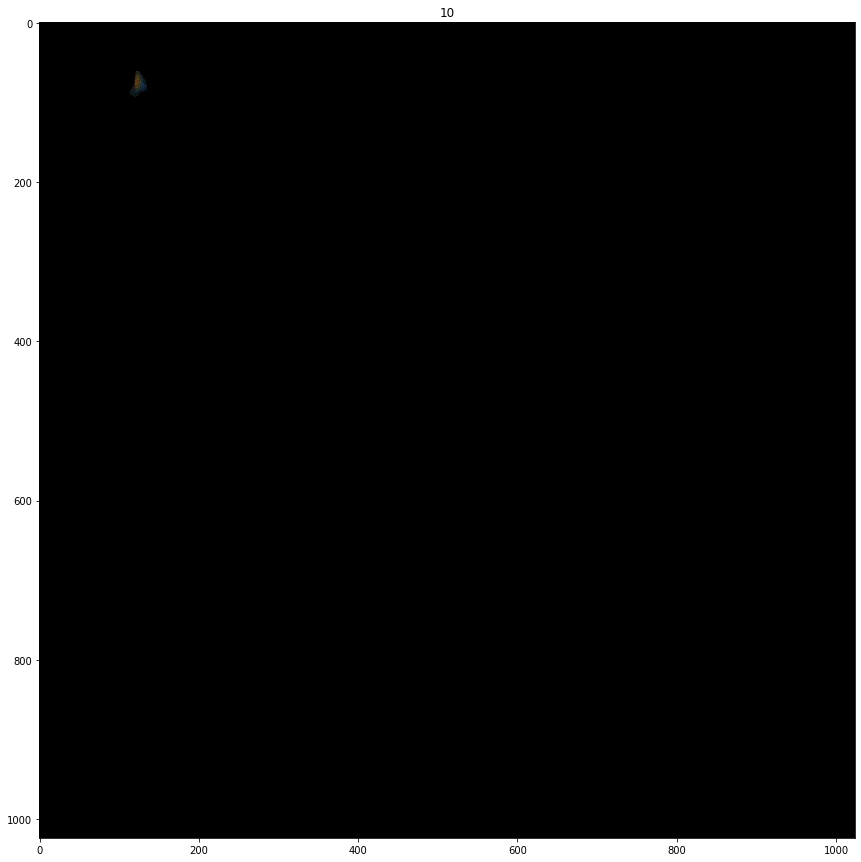

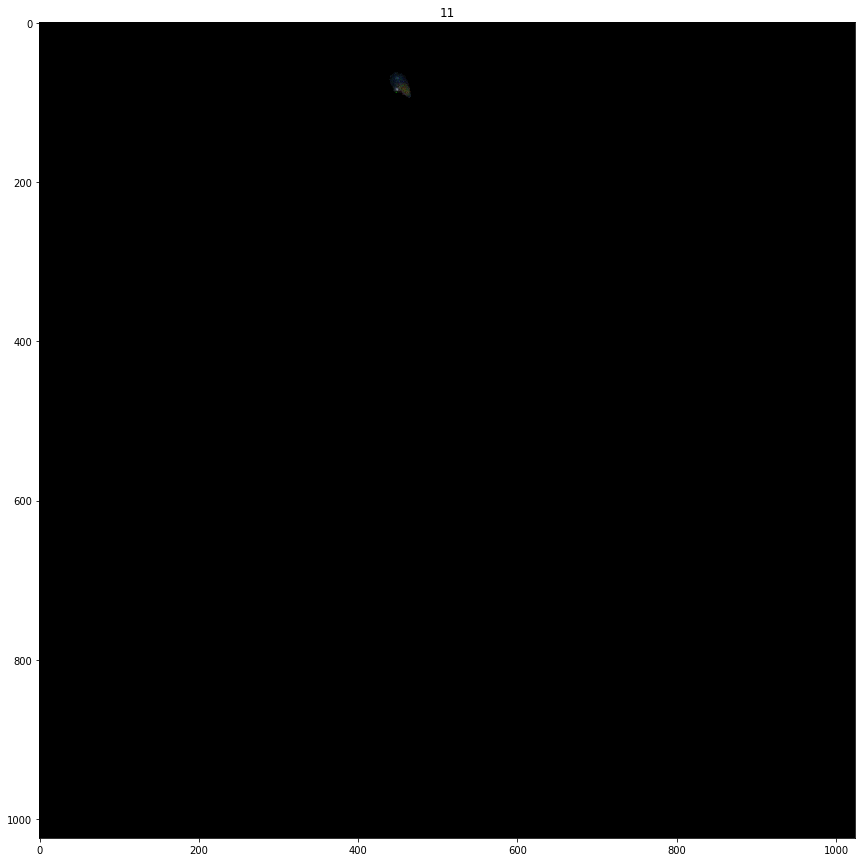

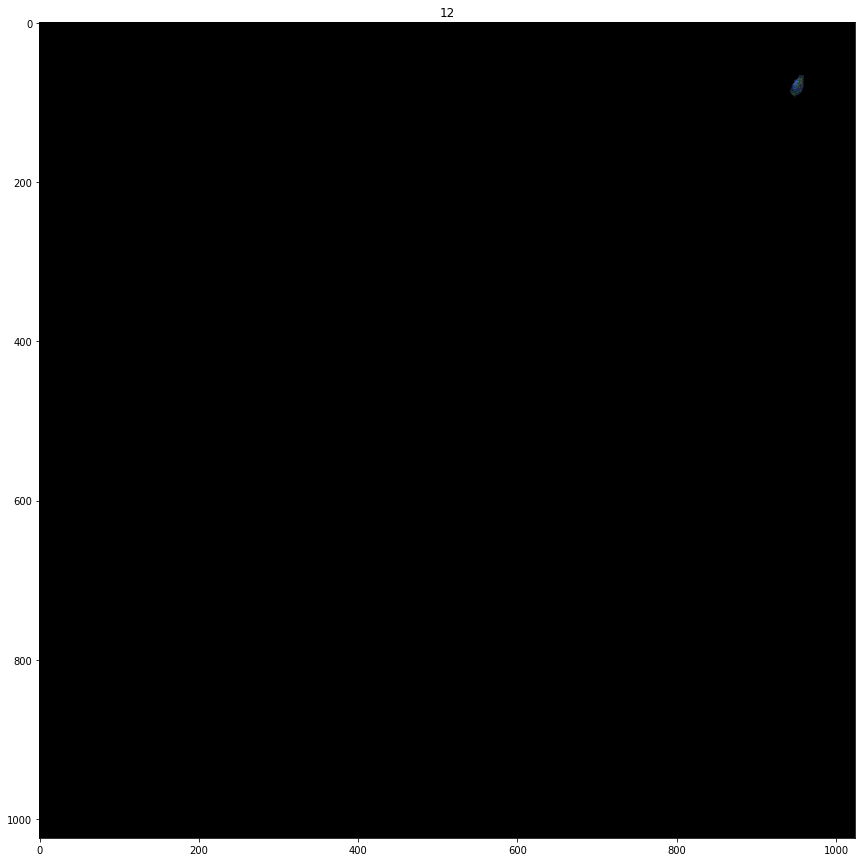

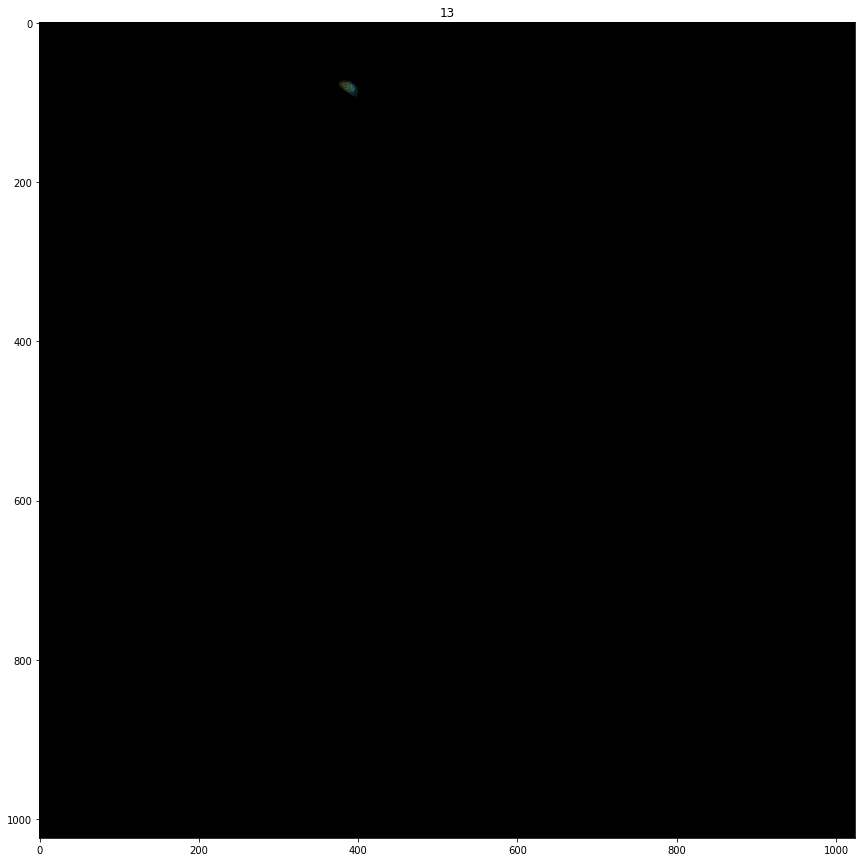

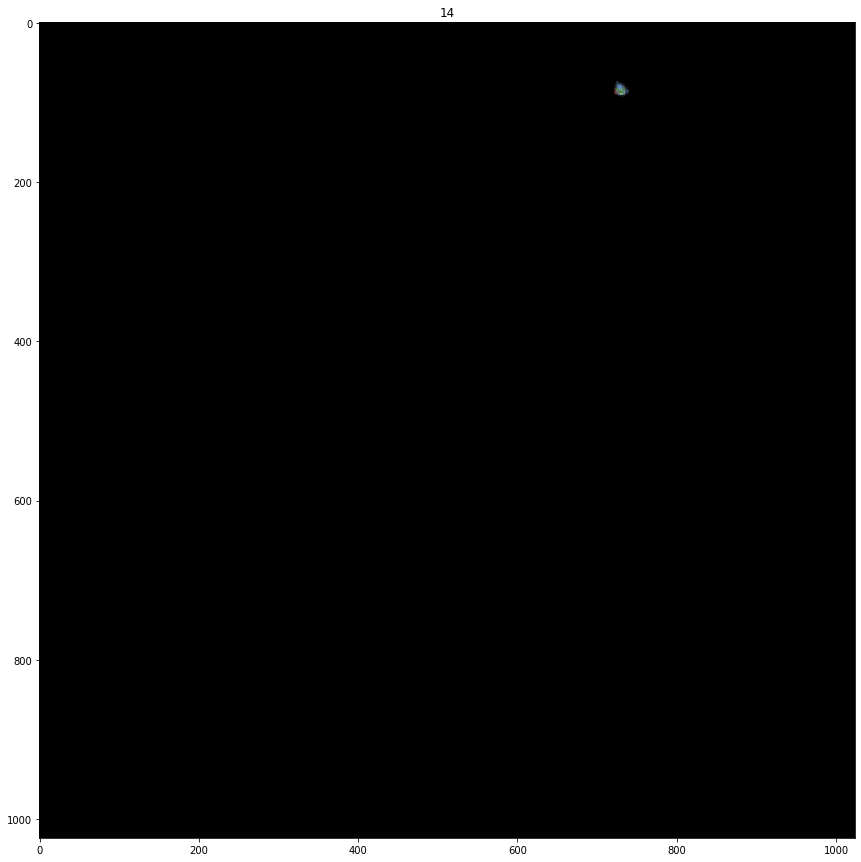

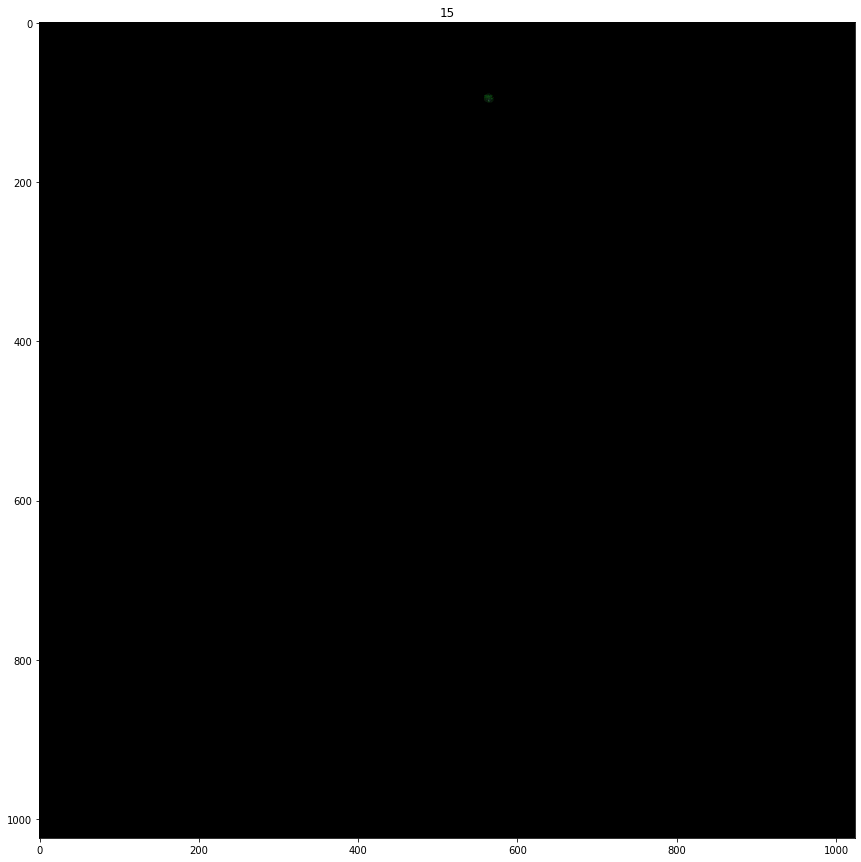

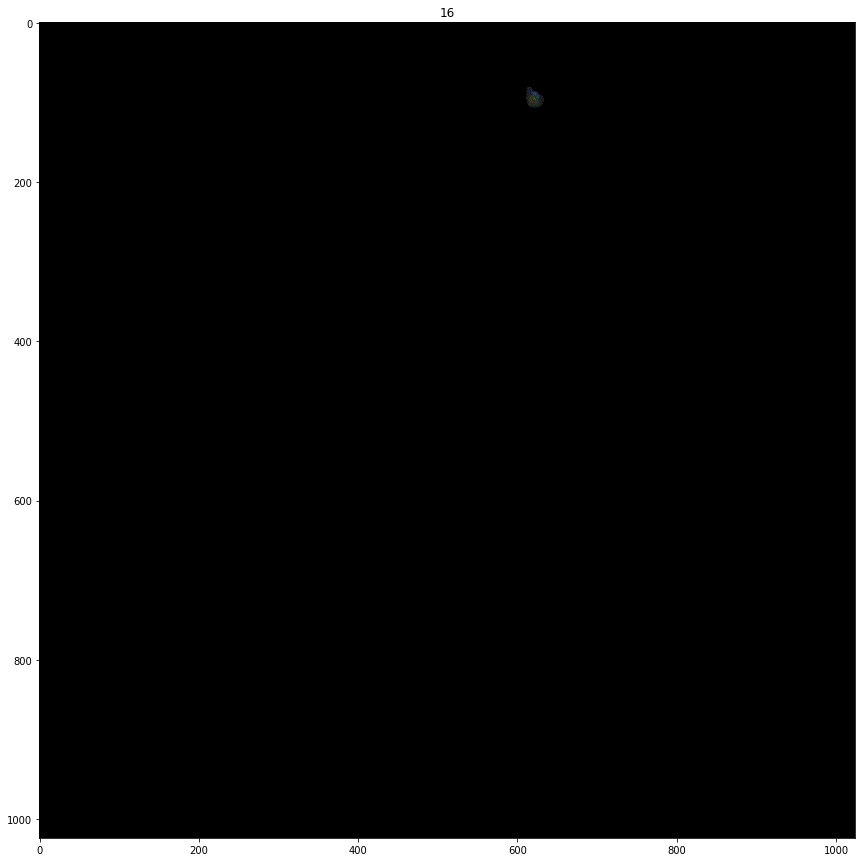

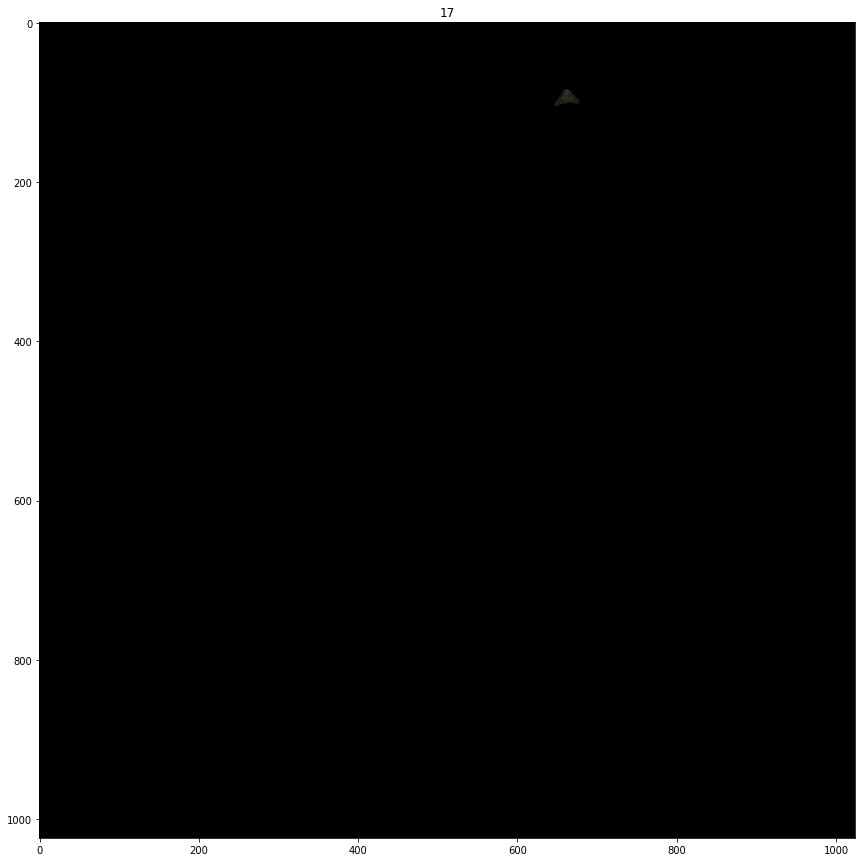

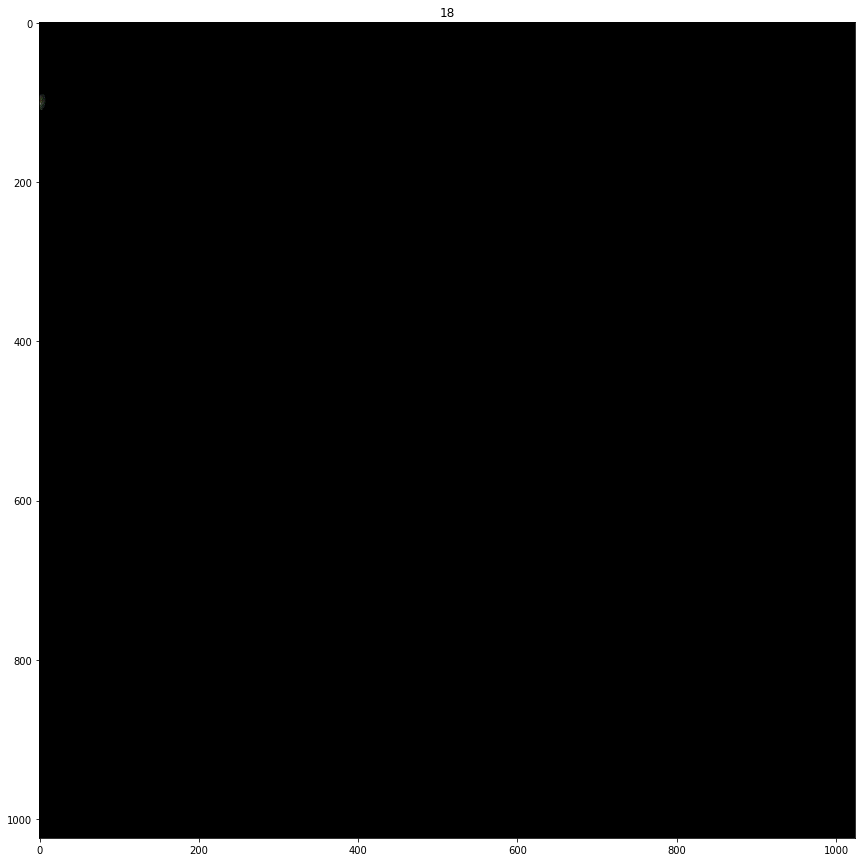

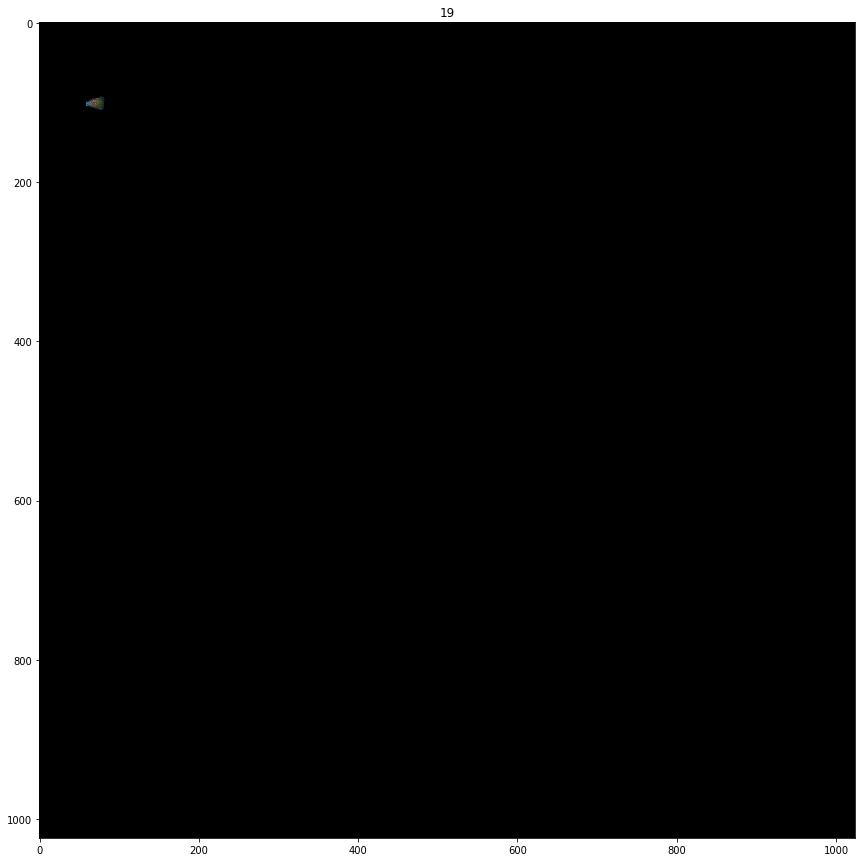

In [130]:
number_segments = masks[0].max()
# number_segments
for i in range(20):
    x = activate(masks[0],i)
    stacked_img = np.stack((x,)*3, axis=-1)
    dst = activateImage(image, stacked_img)
    show(dst,str(i))